# Introduction

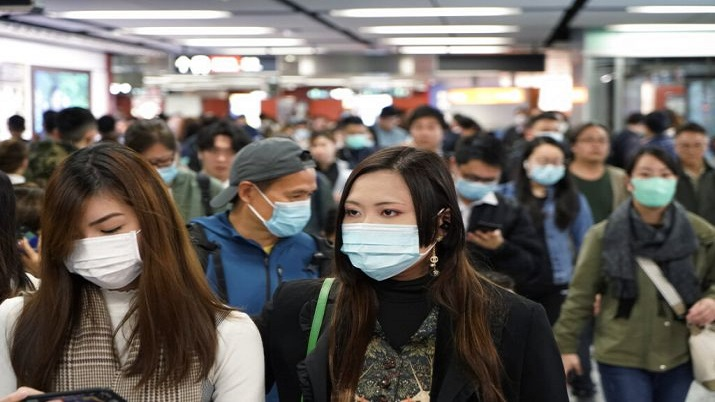

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

Stay informed:

Protect yourself: advice for the public Myth busters Questions and answers Situation reports All information on the COVID-19 outbreak

# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [2]:
train=pd.read_csv(r"../input/covid19-global-forecasting-week-4/train.csv")
test=pd.read_csv(r"../input/covid19-global-forecasting-week-4/test.csv")

In [3]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
31750,32031,South Dakota,US,2020-05-11,3614.0,34.0
18177,18338,NaN,Libya,2020-04-28,61.0,2.0
23118,23323,NaN,Russia,2020-03-28,1264.0,4.0
25932,26162,NaN,Taiwan*,2020-03-17,77.0,1.0
10009,10098,NaN,Congo (Brazzaville),2020-03-27,4.0,0.0
28548,28801,Indiana,US,2020-04-03,3437.0,102.0


In [4]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
2908,2909,Hubei,China,2020-04-29
9700,9701,NaN,Suriname,2020-04-27
8251,8252,NaN,North Macedonia,2020-05-10
11636,11637,New York,US,2020-04-28
6196,6197,NaN,Ireland,2020-04-06
3697,3698,Yunnan,China,2020-05-14


# EDA

In [5]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,ConfirmedCases
Country_Region,
US,1390235.0
Russia,242271.0
United Kingdom,230986.0
Spain,228691.0
Italy,222104.0
Brazil,190137.0
France,178410.0
Germany,174098.0
Turkey,143114.0


Confirmed COVID-19 Cases by country

In [6]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

From the above graph, we can say that US has most Confirmed cases and followed by italy.
The virus has began at China but virus is showing a  greater impact on US and Italy than China

Confirmed COVID-19 cases per day in US

In [7]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

From this graph we can say that,with in short period of time virus has spread more in US and kept in 1st place

In [8]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In italy, Spreading of virus done for a long time and thus effected more people. But in US within short period the spread is more in this way US had a great impact

Confirmed COVID-19 cases per day in China

In [9]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

From the above graph, we can say that, In china this virus has started and continued to spread. From this region, virus began to spread all parts of the world. In china the confirmed cases are increasing day by day.

Confirmed COVID-19 cases per day in Spain

In [10]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

Confirmed COVID-19 Cases per day in Germany

In [11]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

Confirmed COVID-19 cases Per day in India

In [12]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

The confirmed Cases compared to US, China, Italy , Spain and Germany are very less in India. But once it starts spreading it will show a greater impact.

For day to day track of this COVID-19 Cases, Deaths please refer my another notebook [https://www.kaggle.com/eswarchandt/geospatial-analysis-on-covid-19](http://)

In [13]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

,Date,Country_Region,Id,ConfirmedCases,Fatalities
20787,2020-05-13,Vietnam,35225,288.0,0.0
20788,2020-05-13,West Bank and Gaza,35339,375.0,2.0
20789,2020-05-13,Western Sahara,35453,6.0,0.0
20790,2020-05-13,Zambia,35567,446.0,7.0
20791,2020-05-13,Zimbabwe,35681,37.0,4.0


# Time evaluation

In [14]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )
  



In [15]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

Time Series in China

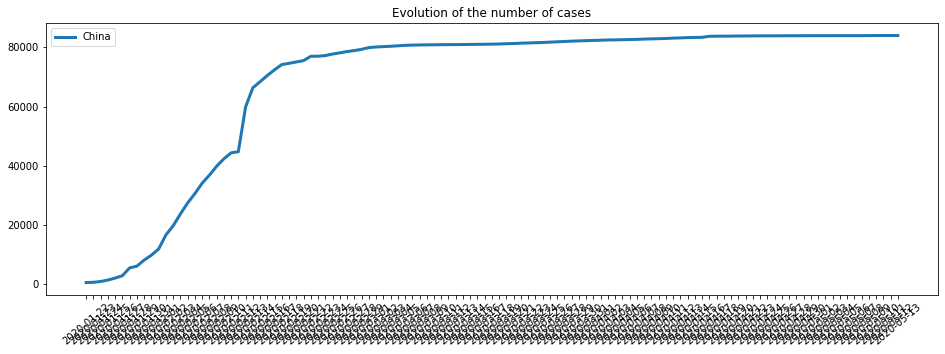

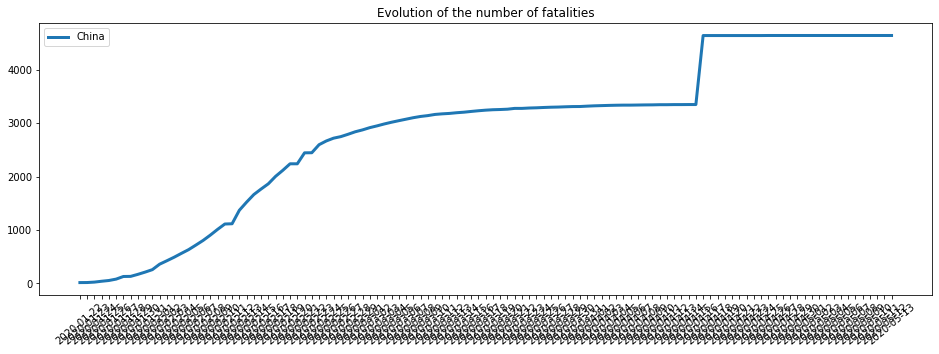

In [16]:
pltCountry_cases('ConfirmedCases','China')
pltCountry_fatalities('Fatalities','China')

Comparing a group of countries with similar evolution: Germany, Spain, France and the US

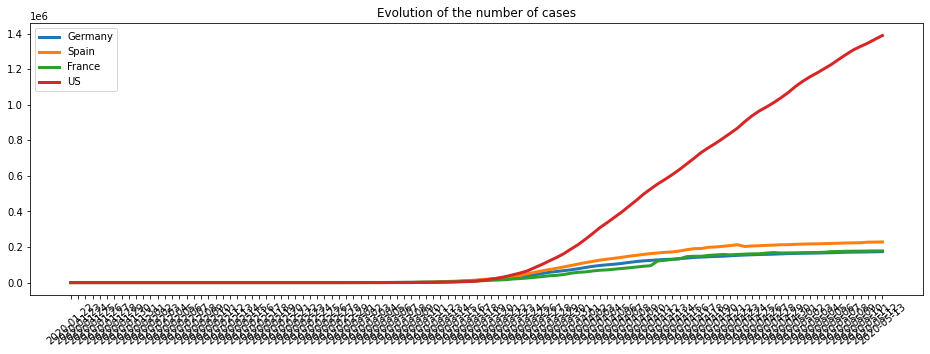

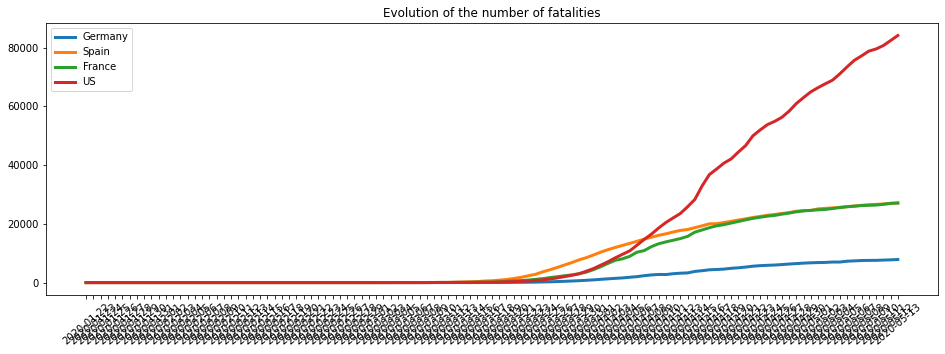

In [17]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','France','US')
pltCountry_fatalities('Fatilities','Germany','Spain','France','US')

In [18]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [19]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

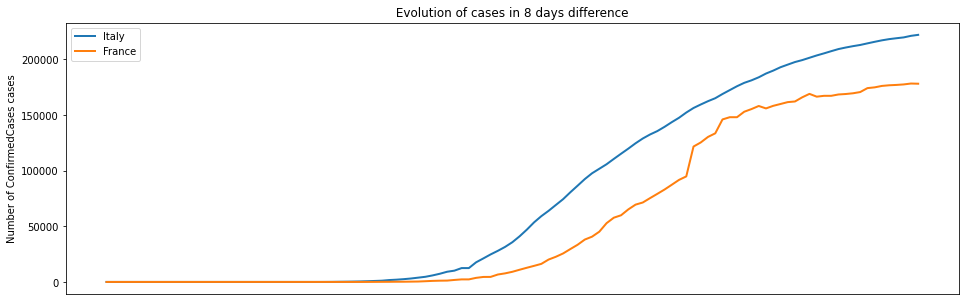

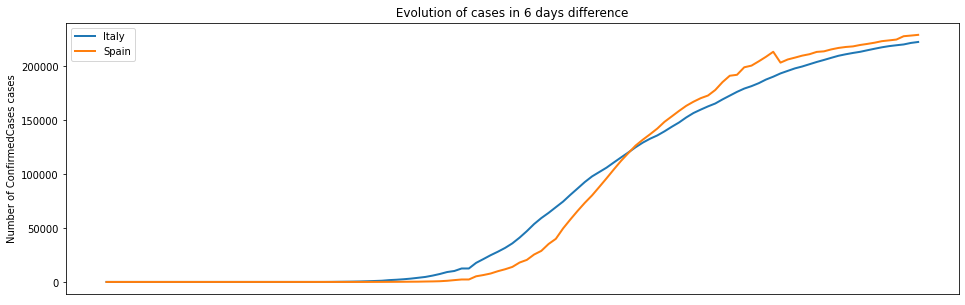

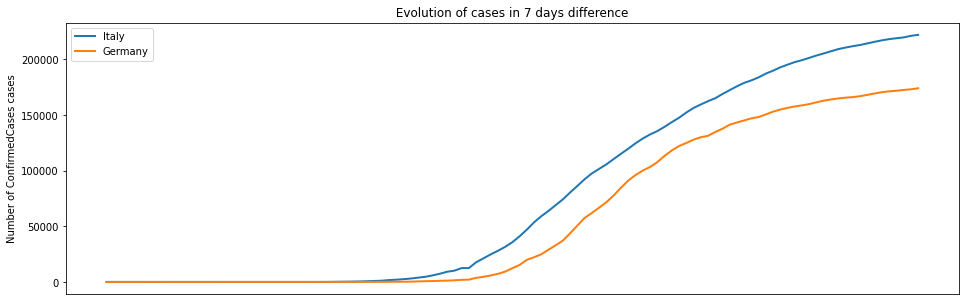

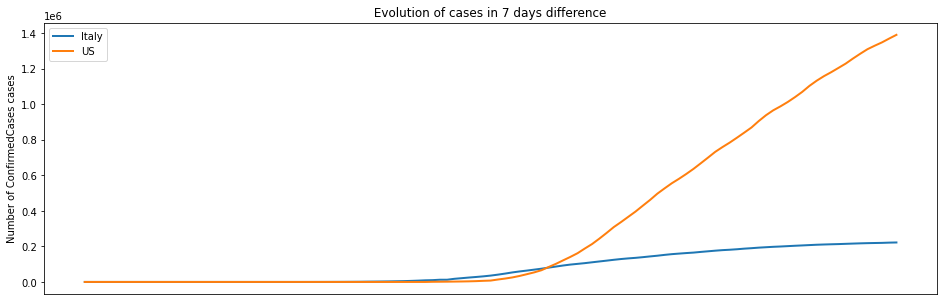

In [20]:
timeCompare(8,'Italy','France')
timeCompare(6,'Italy','Spain')
timeCompare(7,'Italy','Germany')
timeCompare(7,'Italy','US')

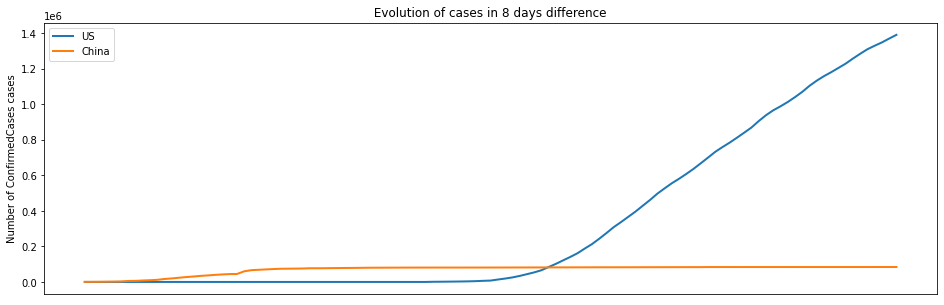

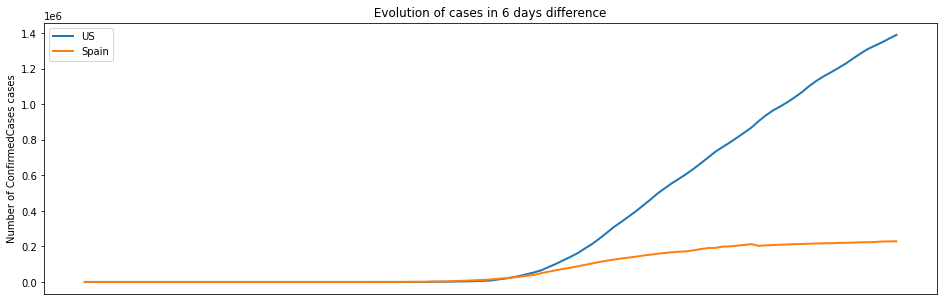

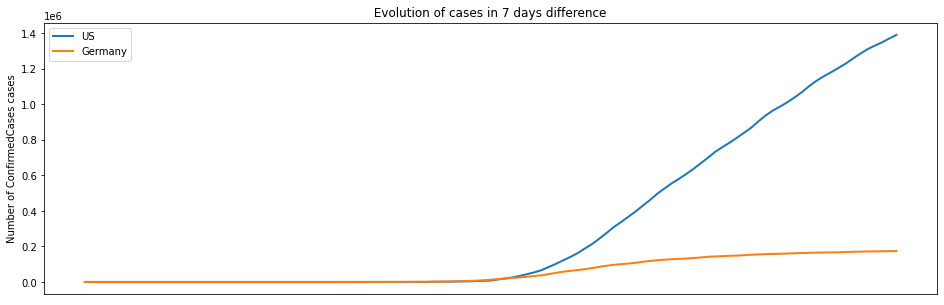

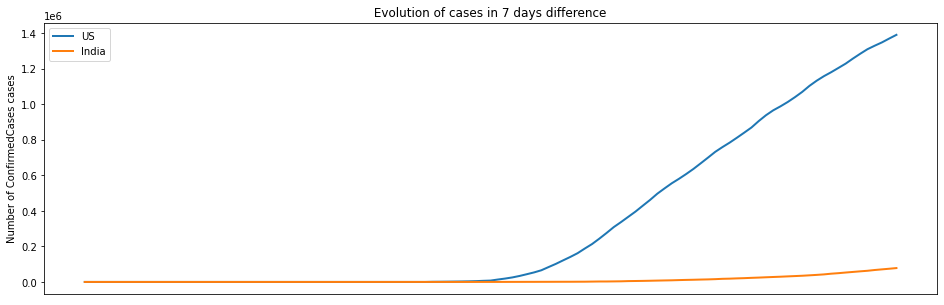

In [21]:
timeCompare(8,'US','China')
timeCompare(6,'US','Spain')
timeCompare(7,'US','Germany')
timeCompare(7,'US','India')

Nice meaning full plots

Well , we have to appreaciate India in maintaining constant cases.US, Italy, China, Spain, Gemany has to take take

In [22]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of Fatalities in %d days difference '%time ,ylabel='Number of %s cases'%case )

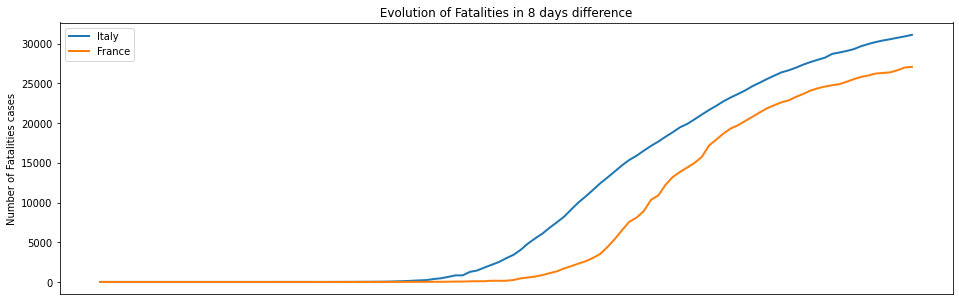

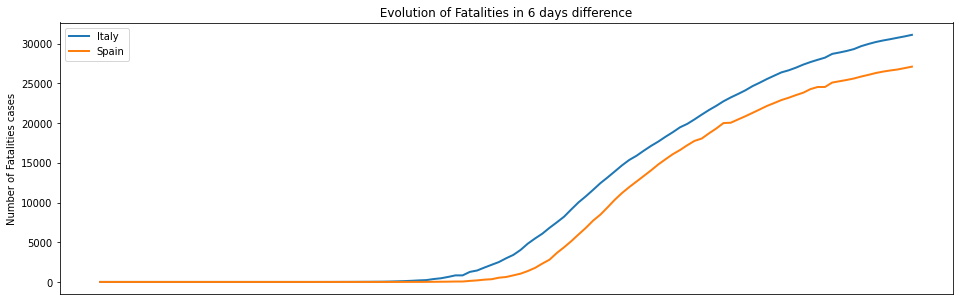

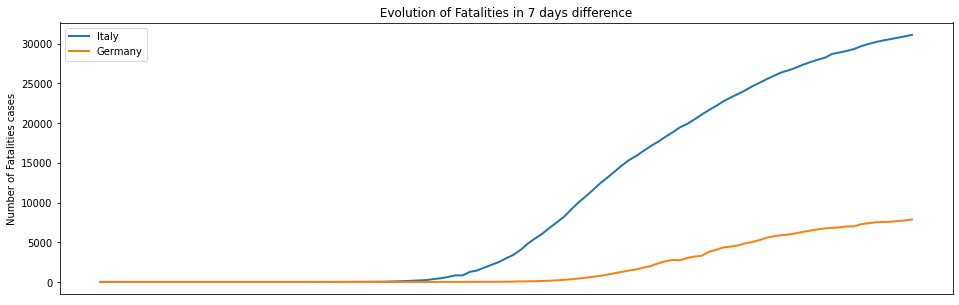

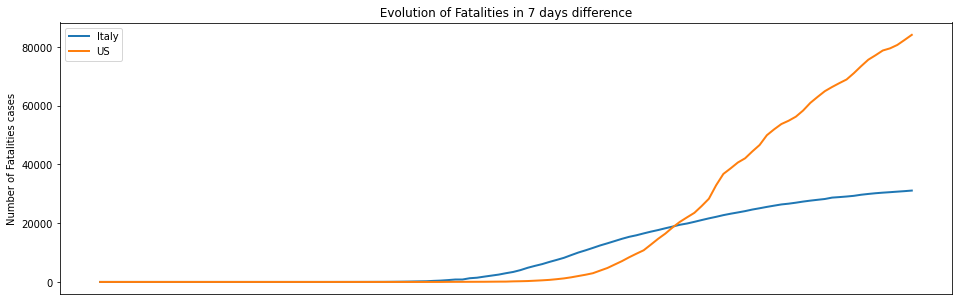

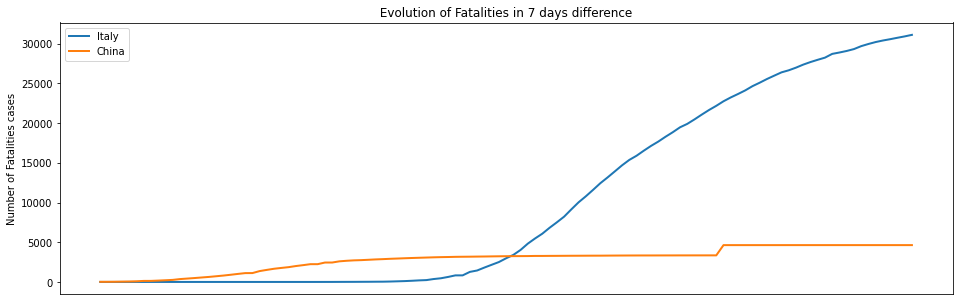

In [23]:
timeCompare_f(8,'Italy','France')
timeCompare_f(6,'Italy','Spain')
timeCompare_f(7,'Italy','Germany')
timeCompare_f(7,'Italy','US')
timeCompare_f(7,'Italy','China')

Italy has more fatalities than US, Germany, France, Spain but less than China initially. italy has grown its fatalities in less time period

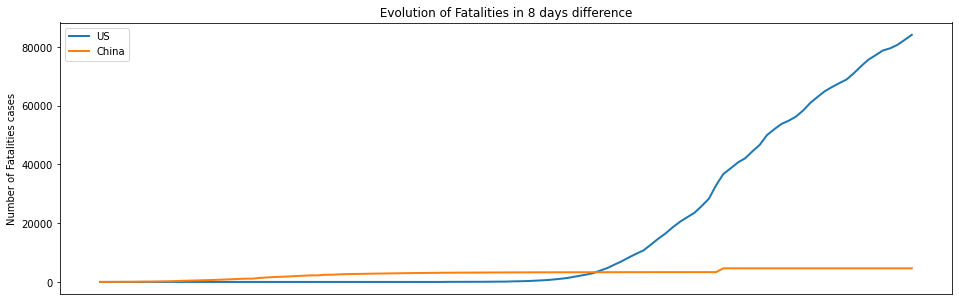

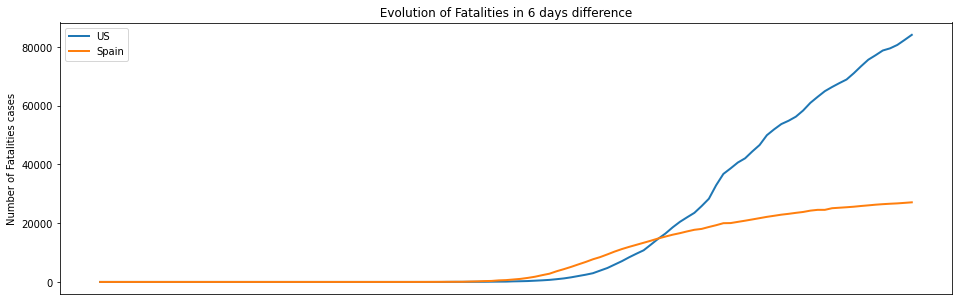

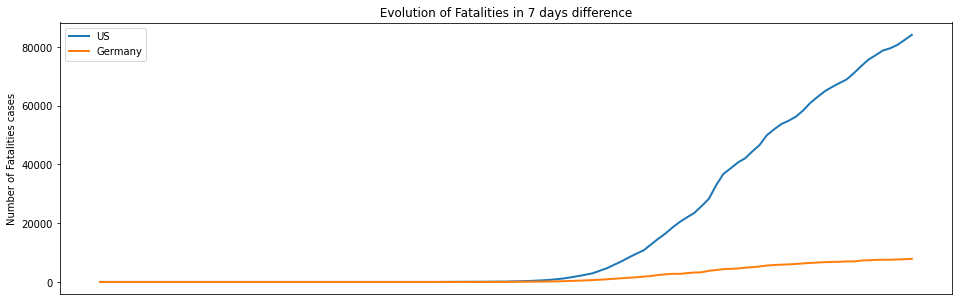

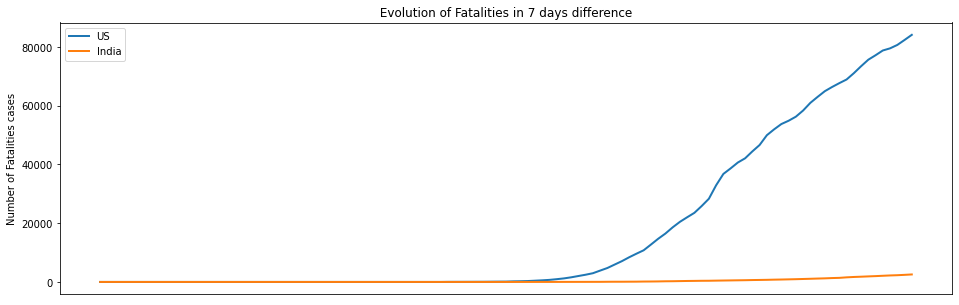

In [24]:
timeCompare_f(8,'US','China')
timeCompare_f(6,'US','Spain')
timeCompare_f(7,'US','Germany')
timeCompare_f(7,'US','India')

Spain and china has more fatalities than US. India and germany has less fatalities than US

# ARIMA

Cases Distribution with Rolling mean and standard deviation

In [25]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

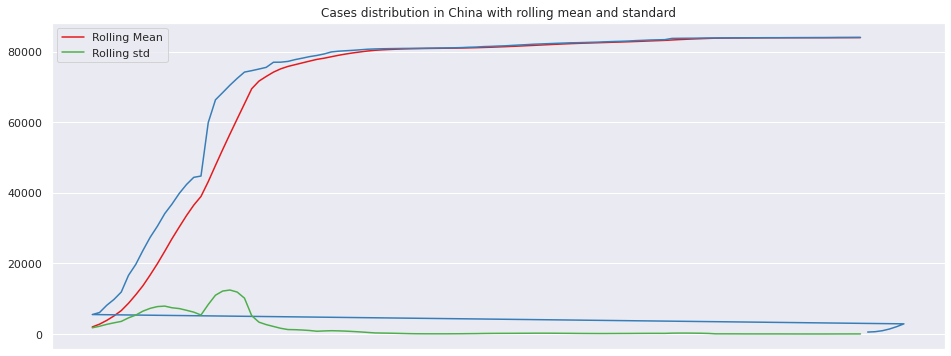

In [26]:
tsC1=roll('China')
rollPlot('China')

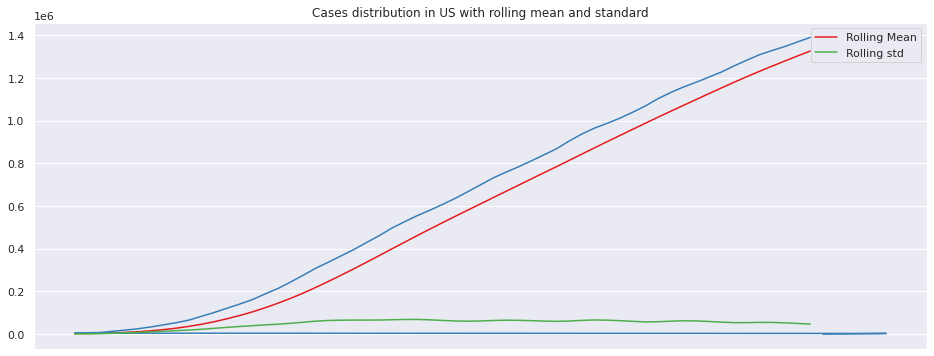

In [27]:
tsC2=roll('US')
rollPlot('US')

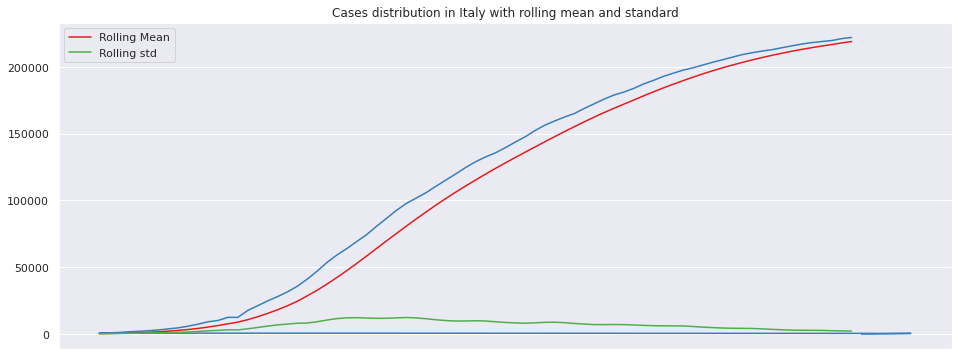

In [28]:
tsC3=roll('Italy')
rollPlot('Italy')

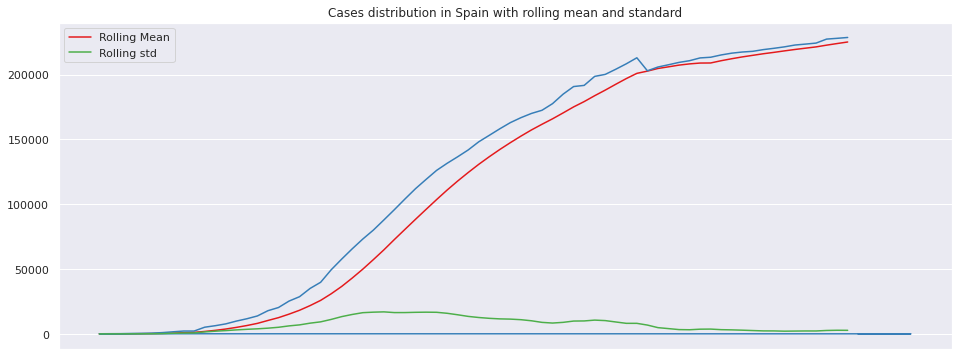

In [29]:
tsC4=roll('Spain')
rollPlot('Spain')

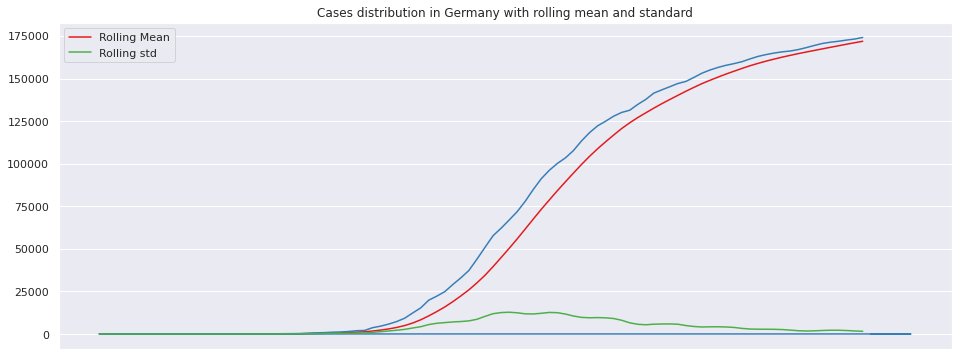

In [30]:
tsC5=roll('Germany')
rollPlot('Germany')

Decomposing the data

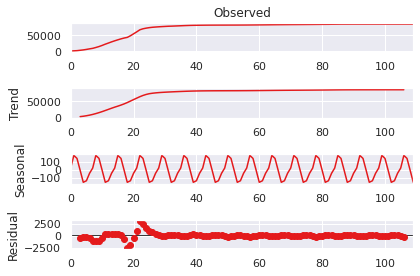

In [31]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

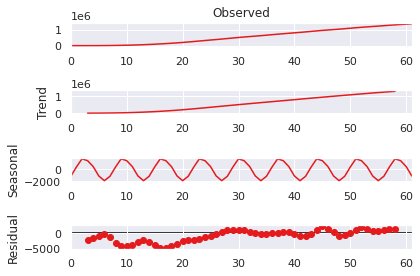

In [32]:
fig=sm.tsa.seasonal_decompose(tsC2.values,freq=7).plot()

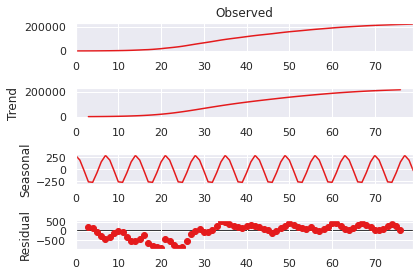

In [33]:
fig=sm.tsa.seasonal_decompose(tsC3.values,freq=7).plot()

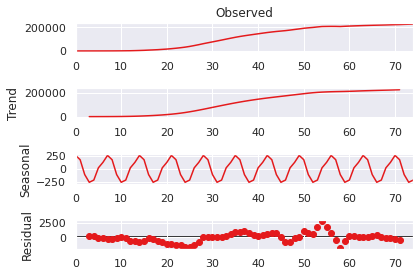

In [34]:
fig=sm.tsa.seasonal_decompose(tsC4.values,freq=7).plot()

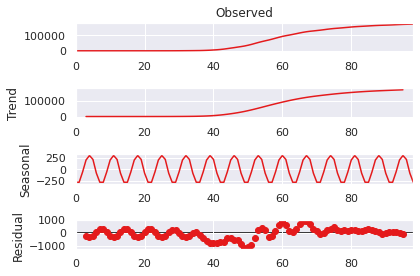

In [35]:
fig=sm.tsa.seasonal_decompose(tsC5.values,freq=7).plot()

From the above graph we analysed timeseries of US, Germany, France, italy ,Spain : Trend , Seasonal , Residual of Confirmed Cases are analysed

Data Stationarity and transformation

In [36]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.181472
p-value                         0.000708
#Lags Used                     13.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [37]:
#For US
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.156983
p-value                         0.691822
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [38]:
#For Italy
tsC=tsC3['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.492825
p-value                         0.537058
#Lags Used                      8.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [39]:
#For Spain
tsC=tsC4['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.062570
p-value                         0.259829
#Lags Used                      9.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [40]:
#For Germany
tsC=tsC5['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.284772
p-value                         0.927634
#Lags Used                      9.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


Here the p-value helps us to reject the null hypothesis of the non-stationarity of the data with confidence, but that assumption is sometimes not enough, we should also consider the time series might not be an AR(auto-regression).
This supposedly means that the parameter i(d) will be 0 and the model would be an ARMA model.

AUTO Correlation

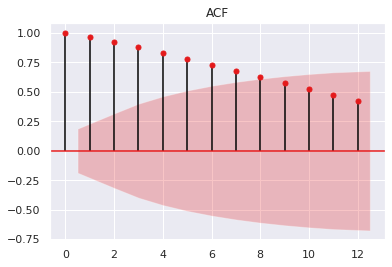

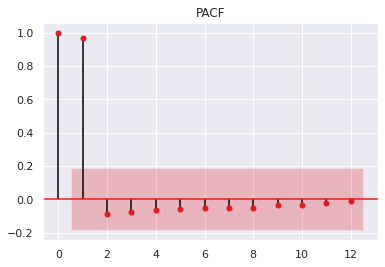

In [41]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For China
corr(tsC1)

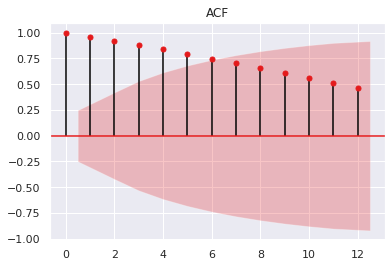

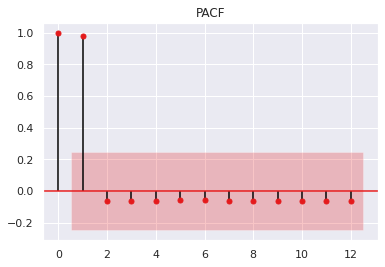

In [42]:
#For US
corr(tsC2)

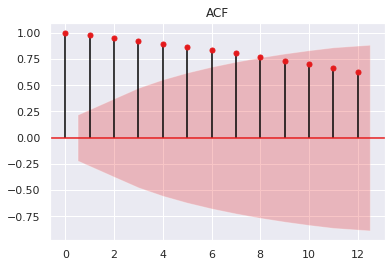

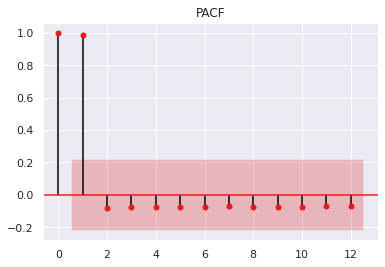

In [43]:
#For Italy
corr(tsC3)

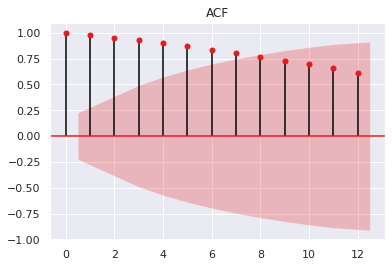

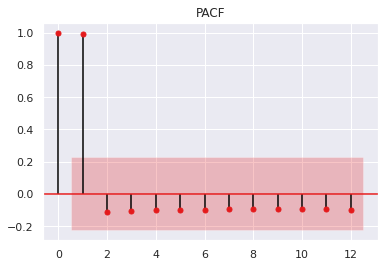

In [44]:
#For Spain
corr(tsC4)

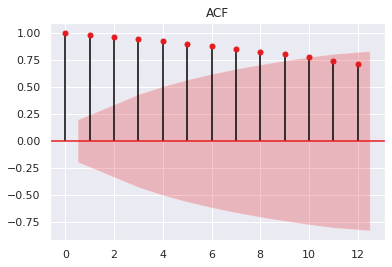

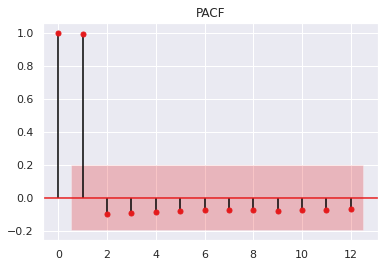

In [45]:
#For Germany
corr(tsC5)

Model Building

In [46]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [47]:

def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [48]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [49]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   82
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -535.774
Method:                       css-mle   S.D. of innovations            157.050
Date:                Thu, 14 May 2020   AIC                           1095.548
Time:                        16:08:22   BIC                           1124.429
Sample:                             2   HQIC                          1107.143
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4355     85.328      0.017      0.987    -165.804     168.675
ar.L1.D2.y     1.1433      0.181      6.310      0.000       0.788       1.498
ar.L2.D2.y    -0.3755      0.203     -1.851      0.0

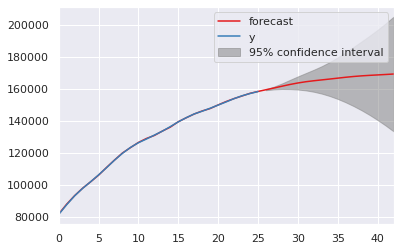

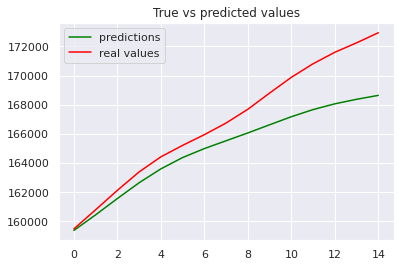

In [50]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

The above obtained graphs are Forecasted and predicted cases in coming week

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   82
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -535.774
Method:                       css-mle   S.D. of innovations            157.050
Date:                Thu, 14 May 2020   AIC                           1095.548
Time:                        16:09:02   BIC                           1124.429
Sample:                             2   HQIC                          1107.143
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4355     85.328      0.017      0.987    -165.804     168.675
ar.L1.D2.y     1.1433      0.181      6.310      0.000       0.788       1.498
ar.L2.D2.y    -0.3755      0.203     -1.851      0.0

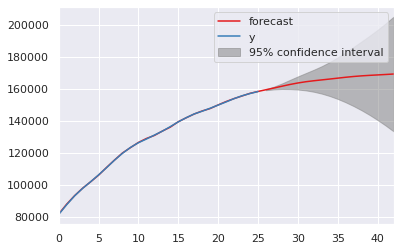

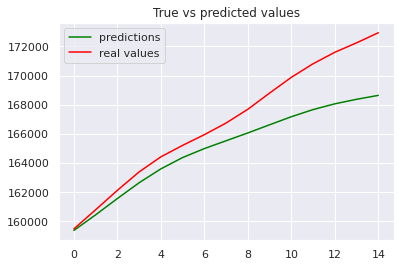

In [51]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

The above are the forecated and predicted fatalities in coming weeks

In this way we can forecast or predict for each and every region

For day to day track and geospatial analysis refer my another notebook in which i explained detailedly and calculated Deaths, cases, Recovered day to day.
Here is my notenok [https://www.kaggle.com/eswarchandt/geospatial-analysis-on-covid-19](http://)

Please upvote if you liked my notebook and keep me motivated 